In [172]:
# For using custom module.
import sys
sys.path.append('../custom_library')

In [173]:
import spacy
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import numpy as np
import pandas as pd 
import connect_to_db as cn
from gensim import corpora
import gensim
import csv
import parmap
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import seaborn as sns

In [174]:
sql = "select community_id_fastgreedy_is, count(*) from nodes_until_november group by community_id_fastgreedy_is having count(*) > 2 order by count(*) asc;"
result_df = cn.select_query_result_to_df(sql)
communities = list(np.array(result_df['community_id_fastgreedy_is'].values.tolist()))

In [176]:
from os import listdir

def find_csv_filenames(path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

filenames = find_csv_filenames("../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne")

communities = []

for name in filenames:
    communities.append(name.split('_')[1])

In [198]:
print(communities)

['6849', '4248', '13798', '8382', '4238', '3663', '6887', '8432', '10417', '8969', '11934', '13491', '8298', '7853', '5255', '4811', '3094', '5452', '7802', '7152', '12619', '9328', '512', '16660', '9989', '15913', '6759', '469', '16130', '3866', '8718', '2735', '4074', '10260', '5118', '16855', '7028', '5260', '15358', '5368', '1832', '2299', '2011', '6329', '3692', '11446', '9603', '13171', '9722', '7947', '16240', '6828', '3430', '19695', '5242', '4443', '5345', '1545', '8827', '19426', '908', '11604', '10954', '12033', '18543', '6247', '2329', '8878', '7338', '4103', '2174', '7742', '2266', '8175', '12189', '1882', '10385', '1501', '12084', '19870', '6084', '1884', '2026', '3901', '13920', '5318', '8367', '11084', '1867', '3938', '5430', '4437', '4574', '1774', '4336', '263', '5443', '866', '6209', '2912', '6197', '9228', '1469', '7936', '640', '5756', '2756', '4017', '2860', '2859', '2898', '15720', '268', '18992', '3954', '11003', '1715', '8322', '3683', '15569', '4372', '1548', 

In [199]:
# print(filenames)
print(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filenames[0]}')

../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/community_6849_topics_10_words.csv


In [178]:
import math

mean_vector_list = []
topics_num = []

for i in range(len(communities)):
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filenames[i]}', newline='') as f:
        reader = csv.reader(f)
        topics = list(reader)
        topics_num.append(len(topics))
        model = Word2Vec(topics, min_count=1)
        model.train(topics, total_examples=1, epochs=1)
    
        word_vectors = model.wv
        # print(len(word_vectors))

        # print(word_vectors[0].tolist())

        word_vector_list = []
        mean_vector = []
    
        for i in range(len(word_vectors)):
            word_vector_list.append(word_vectors[i].tolist())
        
        for element in zip(*word_vector_list):
            mean_vector.append(float(np.mean(element)))
        
        mean_vector_list.append(mean_vector)

In [179]:
print(mean_vector_list[0][0])

-0.0021087670866108965


In [181]:
# convert list to np.array
mean_vector_array = np.array(mean_vector_list)
print(mean_vector_array)

[[-2.10876709e-03  1.34370804e-03  3.93717566e-04 ... -3.81419776e-03
   4.06157087e-04 -5.03940304e-04]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]
 ...
 [-2.93874268e-03  2.18808653e-03  8.12756481e-04 ... -2.59948198e-03
   1.01563270e-03 -1.06801566e-03]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]]


## t-SNE

In [182]:
from sklearn.manifold import TSNE

data = mean_vector_array
print(type(data))
print(data)
# n_components = 2

# model = TSNE(n_components=n_components)
# print(model.fit_transform(data))

plt.rc('axes', unicode_minus=False)
tsne = TSNE(random_state = 42)
data_tsne = tsne.fit_transform(data)
print(data_tsne)

<class 'numpy.ndarray'>
[[-2.10876709e-03  1.34370804e-03  3.93717566e-04 ... -3.81419776e-03
   4.06157087e-04 -5.03940304e-04]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]
 ...
 [-2.93874268e-03  2.18808653e-03  8.12756481e-04 ... -2.59948198e-03
   1.01563270e-03 -1.06801566e-03]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]
 [-3.16055961e-03  1.30249924e-03 -4.60402909e-05 ... -1.75608762e-03
   1.85324754e-03 -6.10377081e-04]]
[[-29.778774  -25.000711 ]
 [  3.606549    6.295797 ]
 [  1.2227609   8.144201 ]
 ...
 [ 43.496006  -16.084393 ]
 [ -1.7983787  12.323054 ]
 [ -2.031797   16.36044  ]]


In [ ]:
plt.figure(figsize=(10,10))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

print(data_tsne)

for i in range(len(data)):
    plt.text(data_tsne[i,0], data_tsne[i,1], 'o',
            fontdict = {'weight':'bold','size':9})

In [188]:
print(len(data))
print(len(topics_num))

print(topics_num)

8228
8228
[1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,

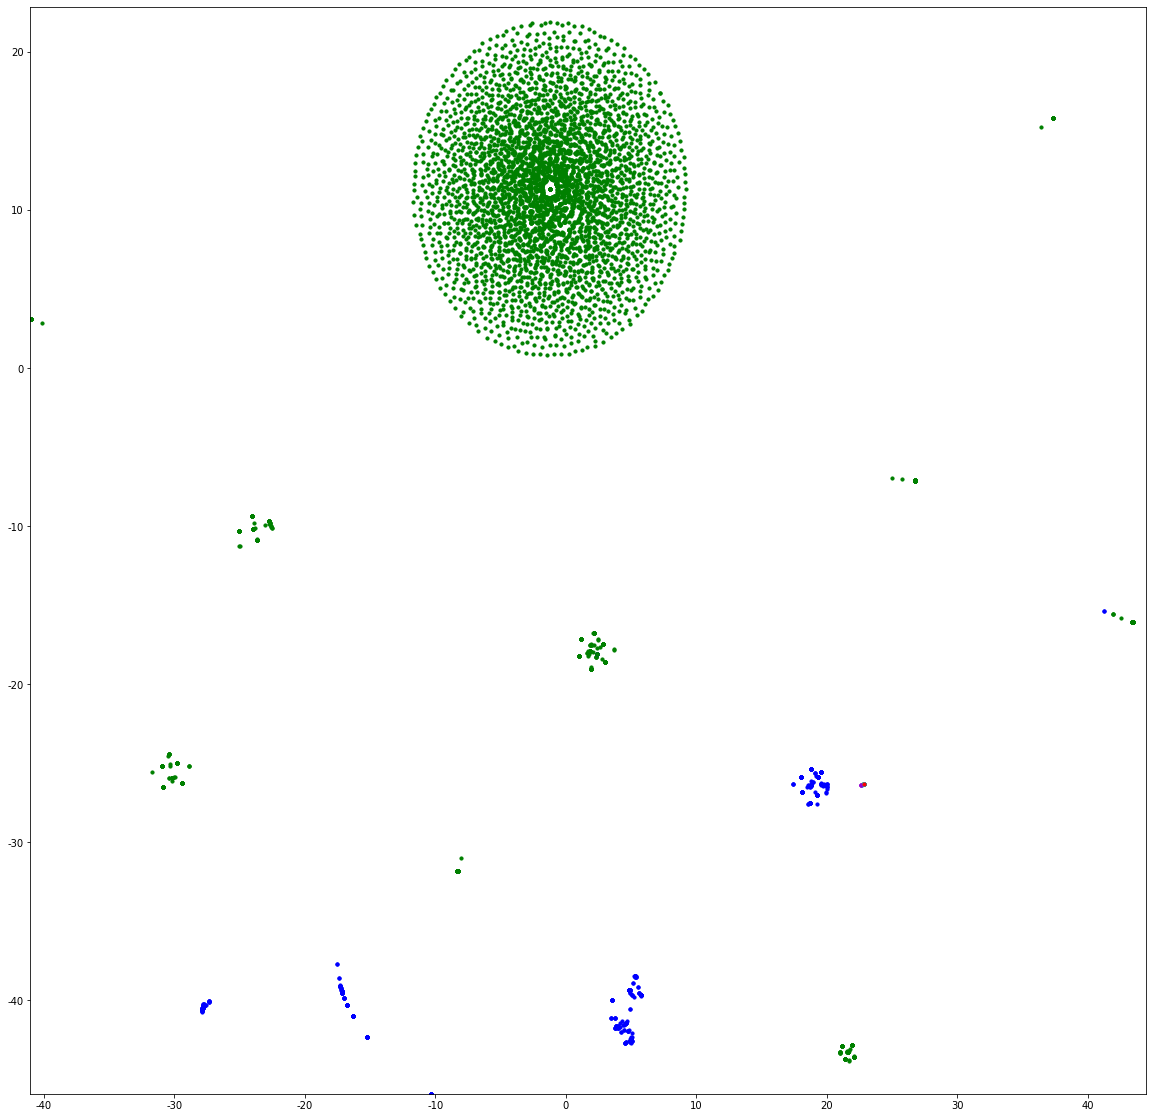

In [204]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)
for i in range(len(data)):
    if topics_num[i] == 10:
        color = 'darkviolet'
    elif topics_num[i] == 5:
        color = 'r'
    elif topics_num[i] == 4:
        color = 'c'
    elif topics_num[i] == 3:
        color = 'b'
    else:
        color = 'g'
        
    size = 10
    plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

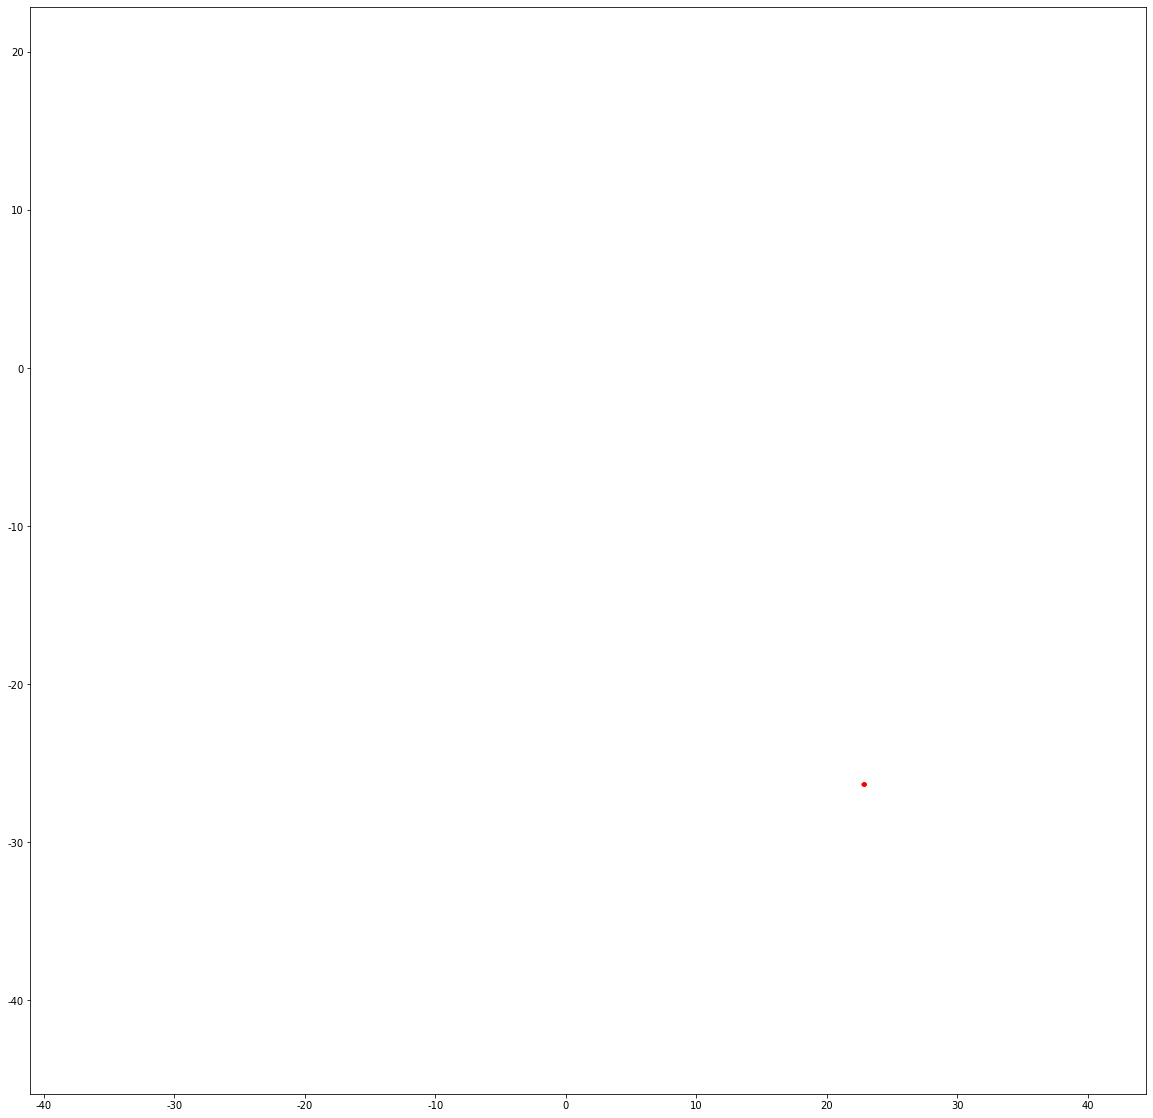

In [196]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

size = 10
for i in range(len(data)):
    if topics_num[i] == 5:
        color = '#ff0000'
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
        
    # plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

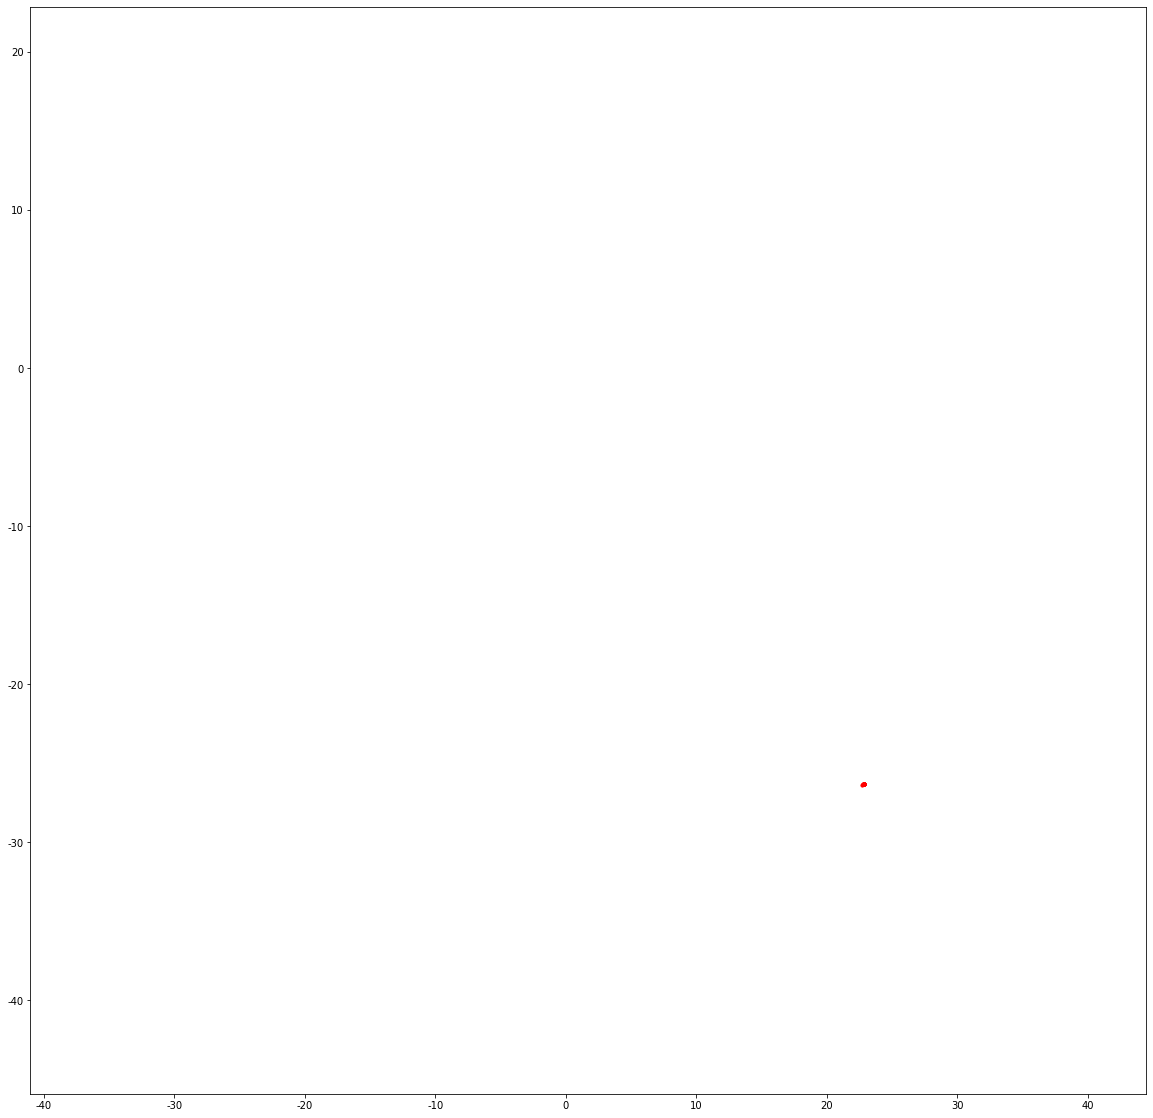

In [310]:
plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

size = 10
for i in range(len(data)):
    if topics_num[i] == 4:
        color = '#ff0000'
        plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
        
    # plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
plt.show()

# number of topic 10 and 5 and 4

## topic_nums = 10 (members >= 10000)

In [309]:
communities_10 = []
communities_5 = []
communities_4 = []


for i in range(len(data)):
    if topics_num[i] == 10:
        communities_10.append(filenames[i])
    elif topics_num[i] == 5:
        communities_5.append(filenames[i])
    elif topics_num[i] == 4:
        communities_4.append(filenames[i])

# number of topic 3

In [264]:
communities_3 = []

for i in range(len(data)):
    if topics_num[i] == 3:
        communities_3.append(filenames[i])

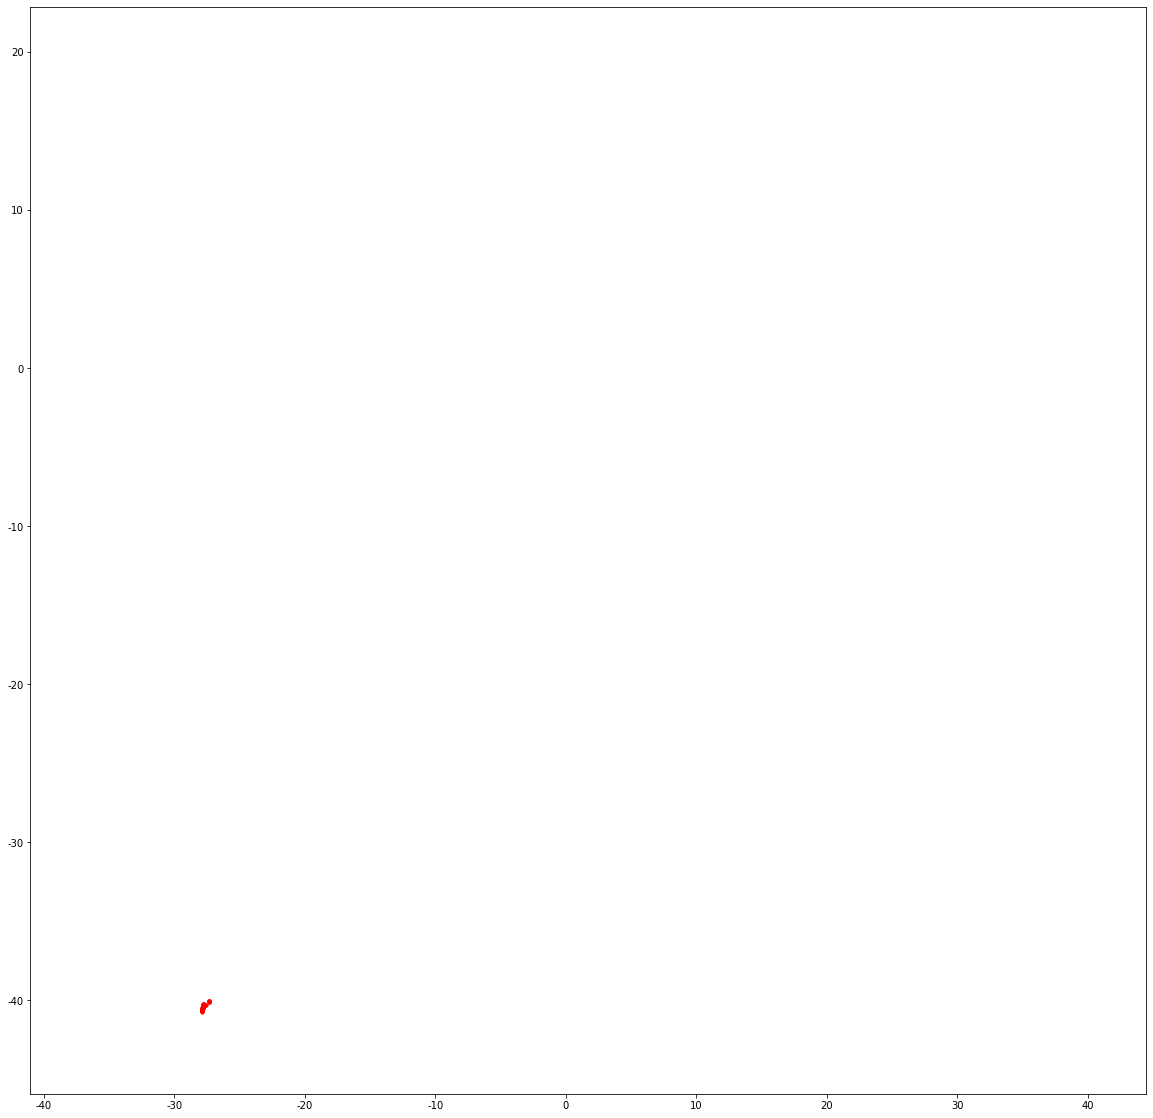

In [265]:
communities_3_1 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,0] > -30 and data_tsne[i,0] < -20 and data_tsne[i,1] < -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_1.append(filenames[i])

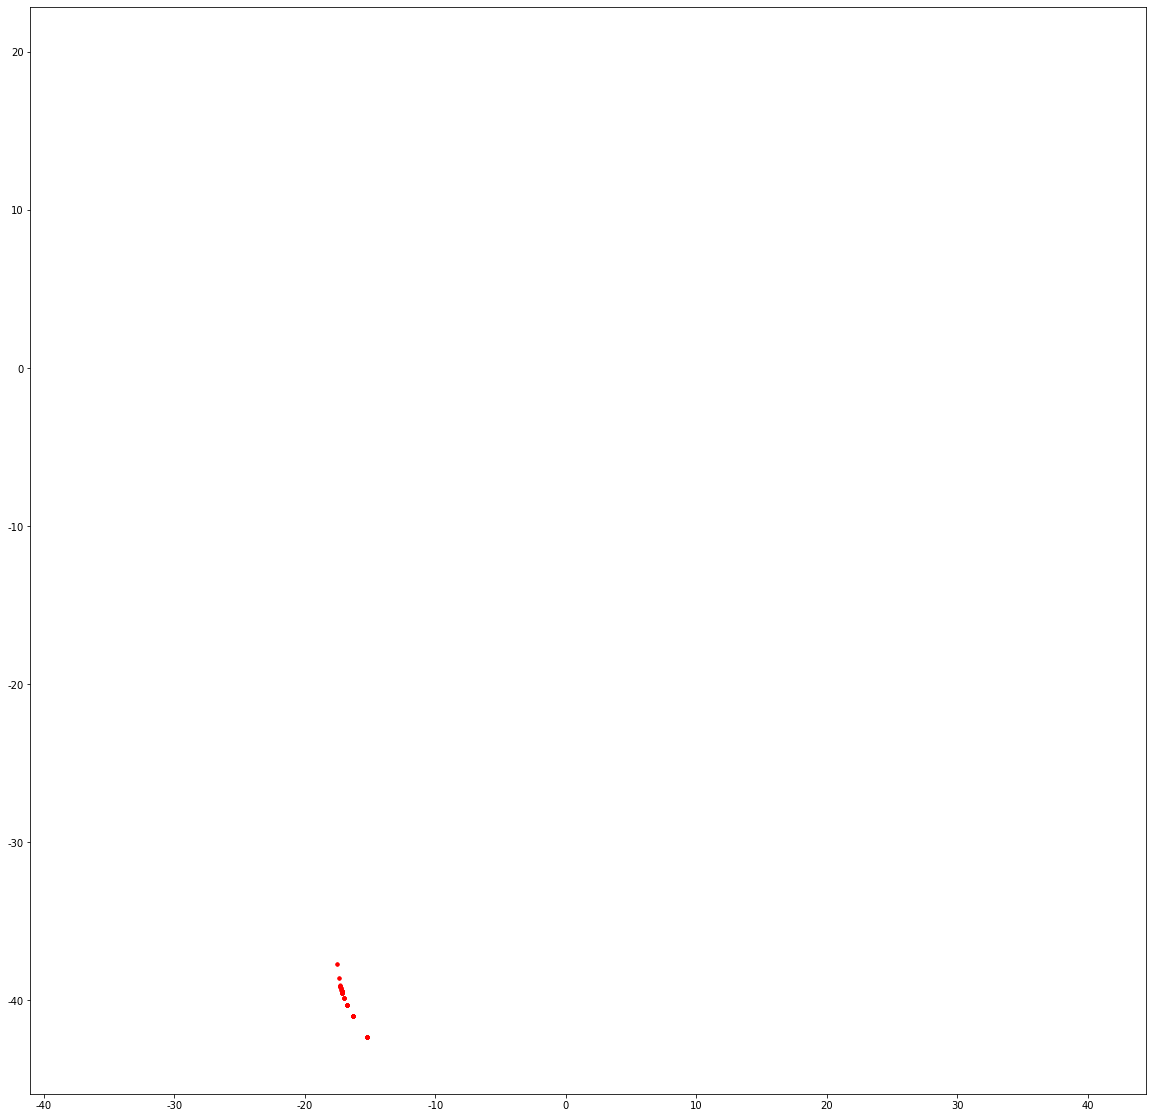

In [282]:
communities_3_2 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,0] > -20 and data_tsne[i,0] < -12:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_2.append(filenames[i])

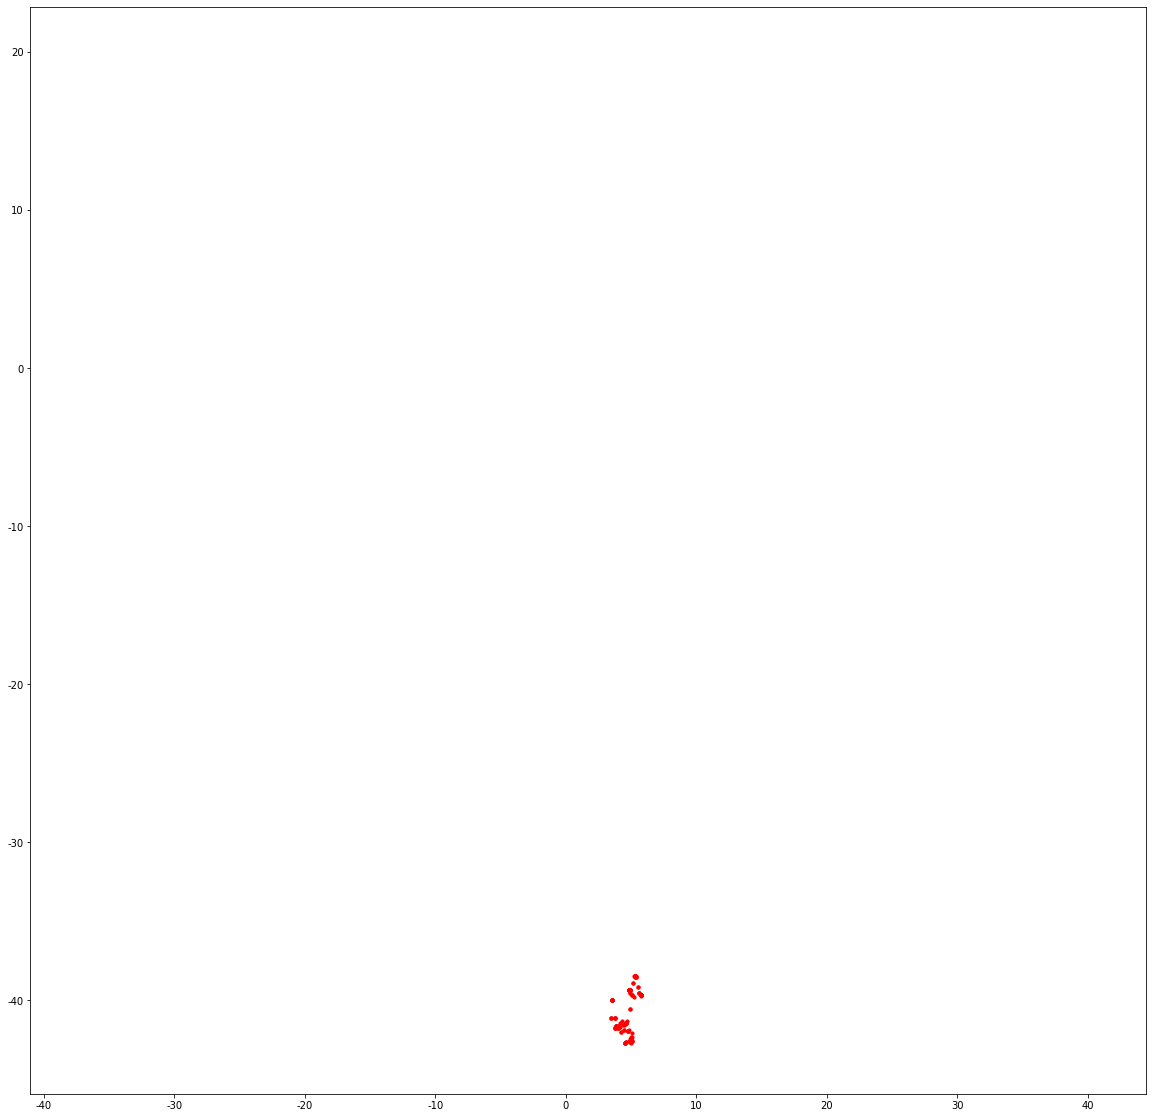

In [289]:
communities_3_3 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,0] > 0 and data_tsne[i,0] < 10 and data_tsne[i,1] < -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_3.append(filenames[i])

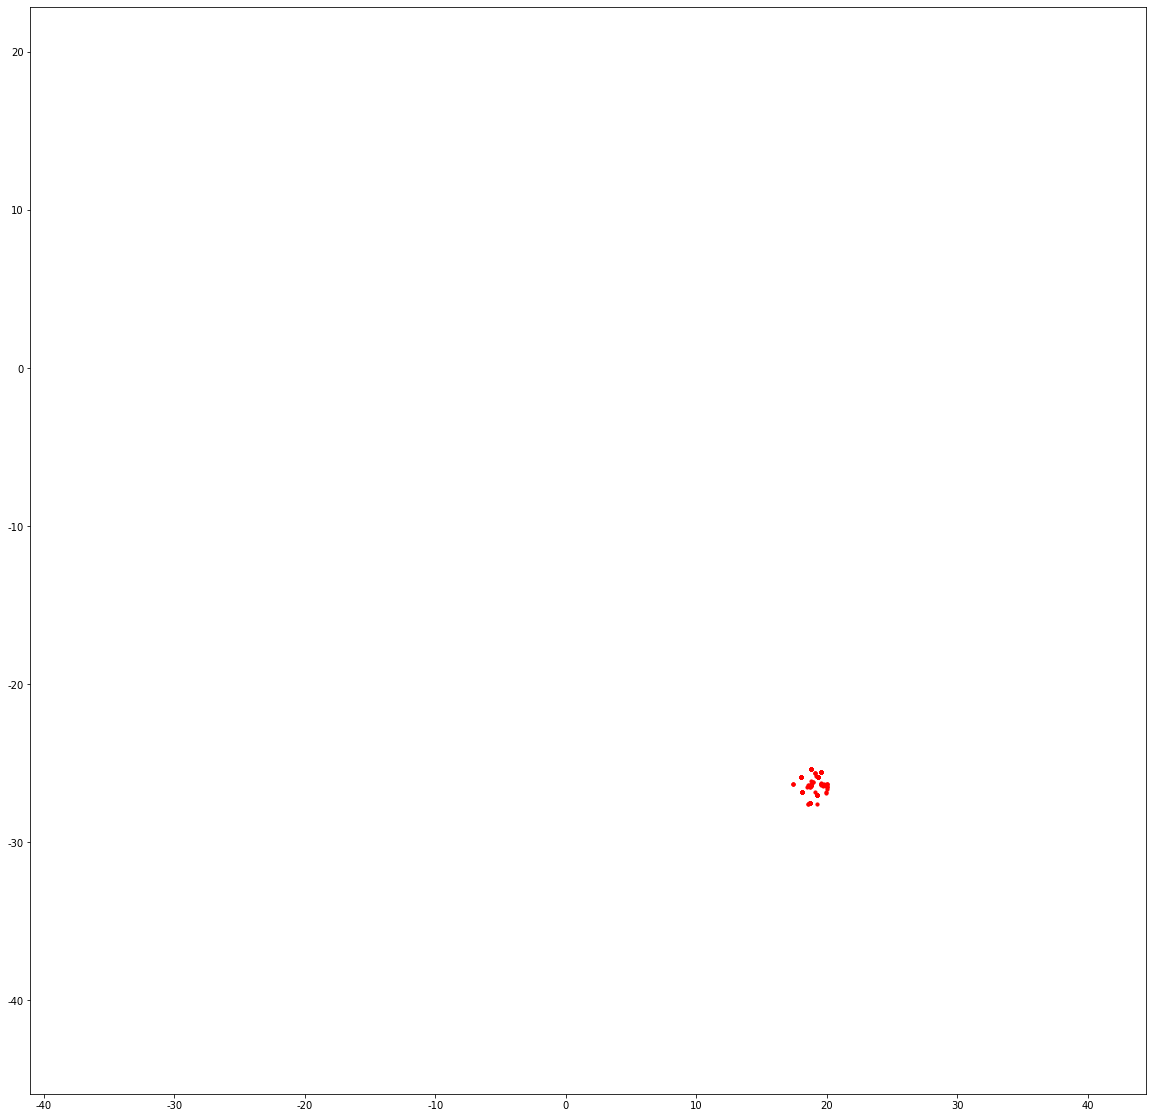

In [290]:
communities_3_4 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 3:
        if data_tsne[i,1] > -30 and data_tsne[i,1] < -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_3_4.append(filenames[i])

# number of topic 1

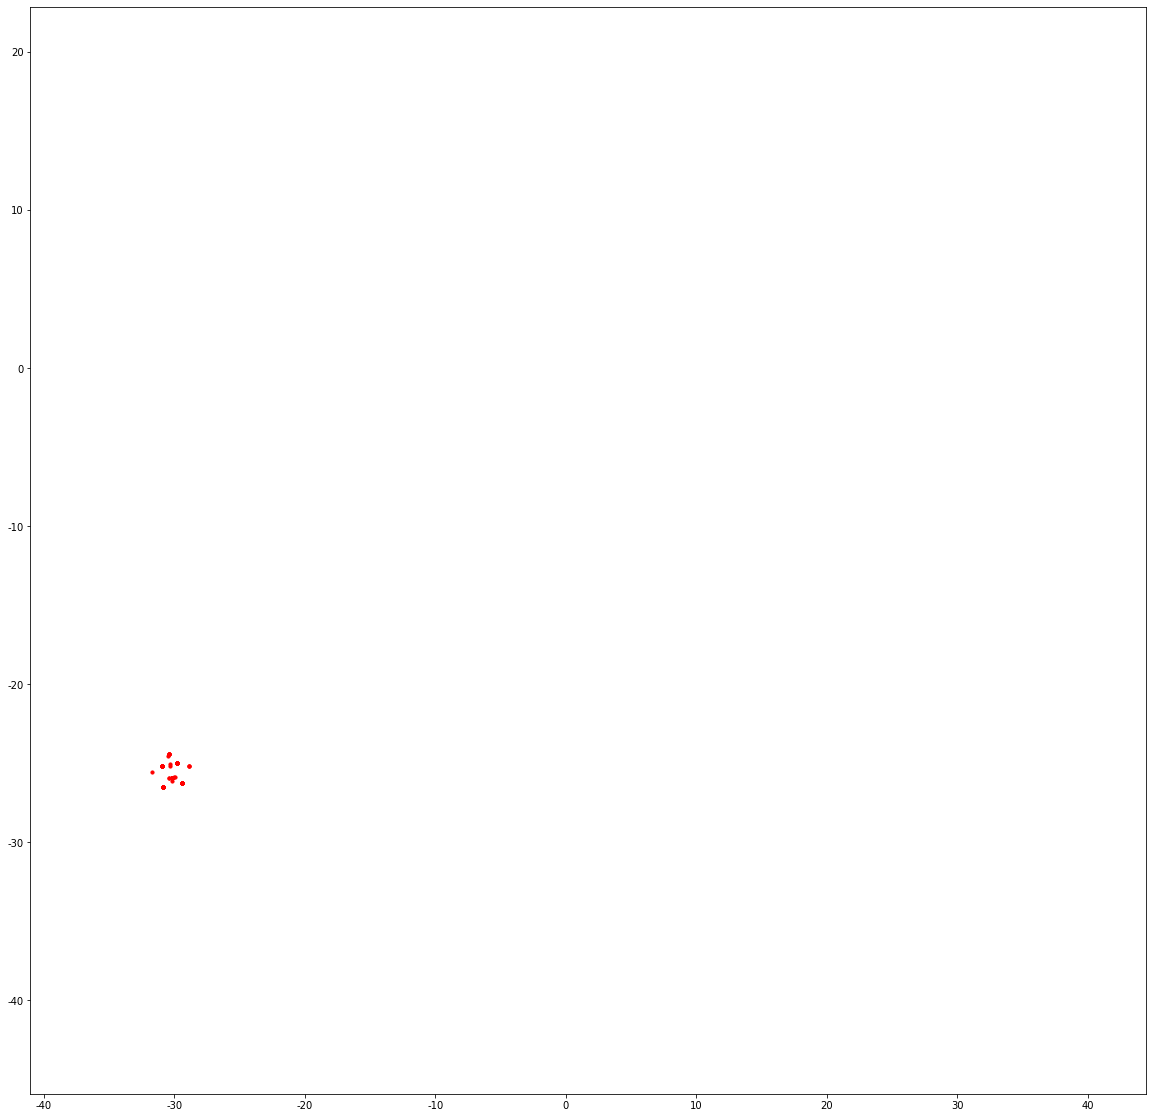

In [326]:
communities_1_1 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,0] > -35 and data_tsne[i,0] < -28:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_1.append(filenames[i])

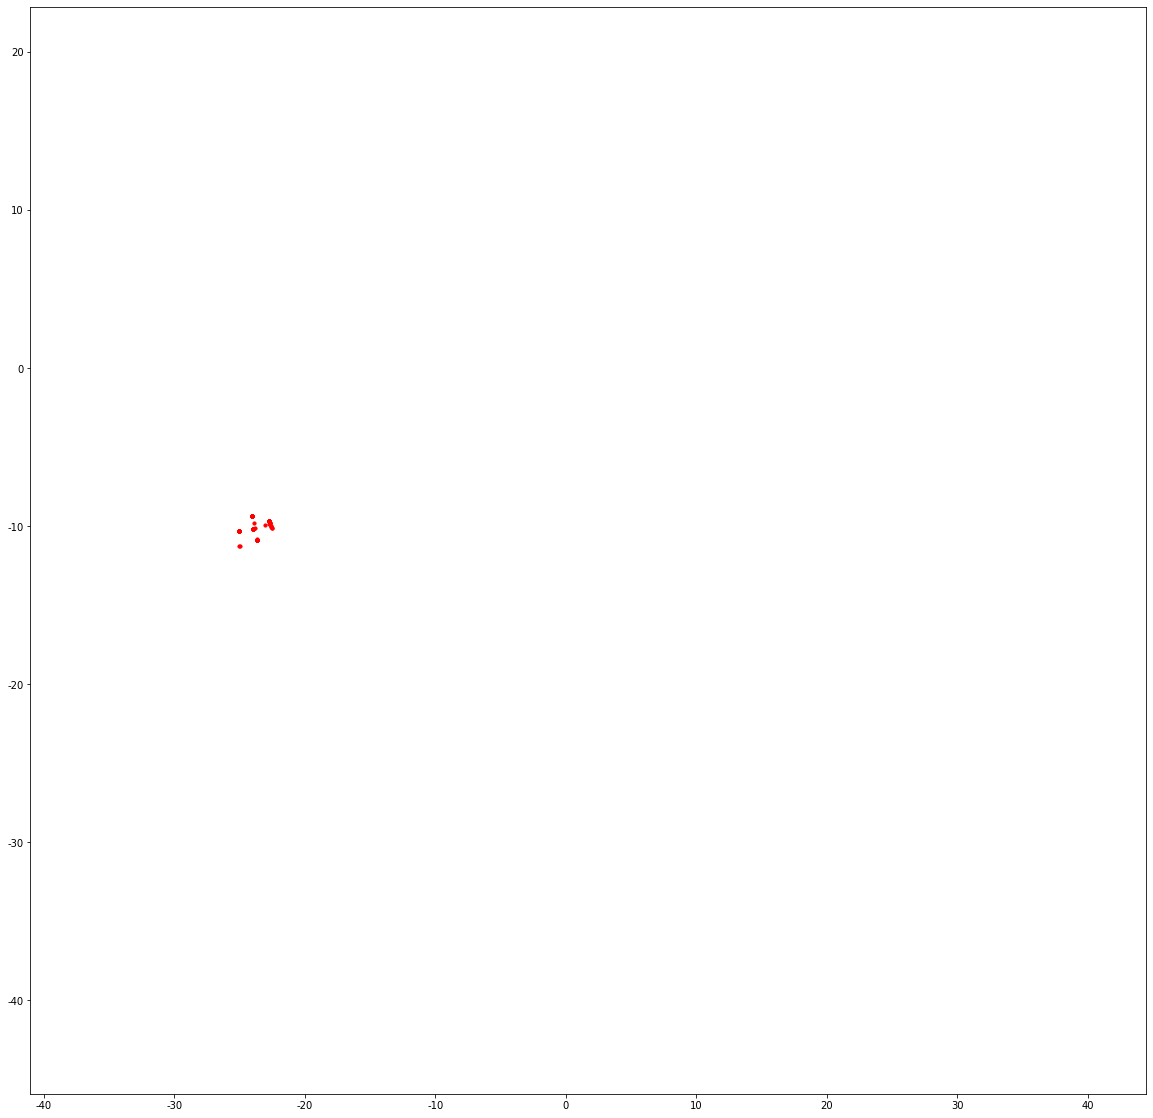

In [327]:
communities_1_2 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,0] > -28 and data_tsne[i,0] < -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_2.append(filenames[i])

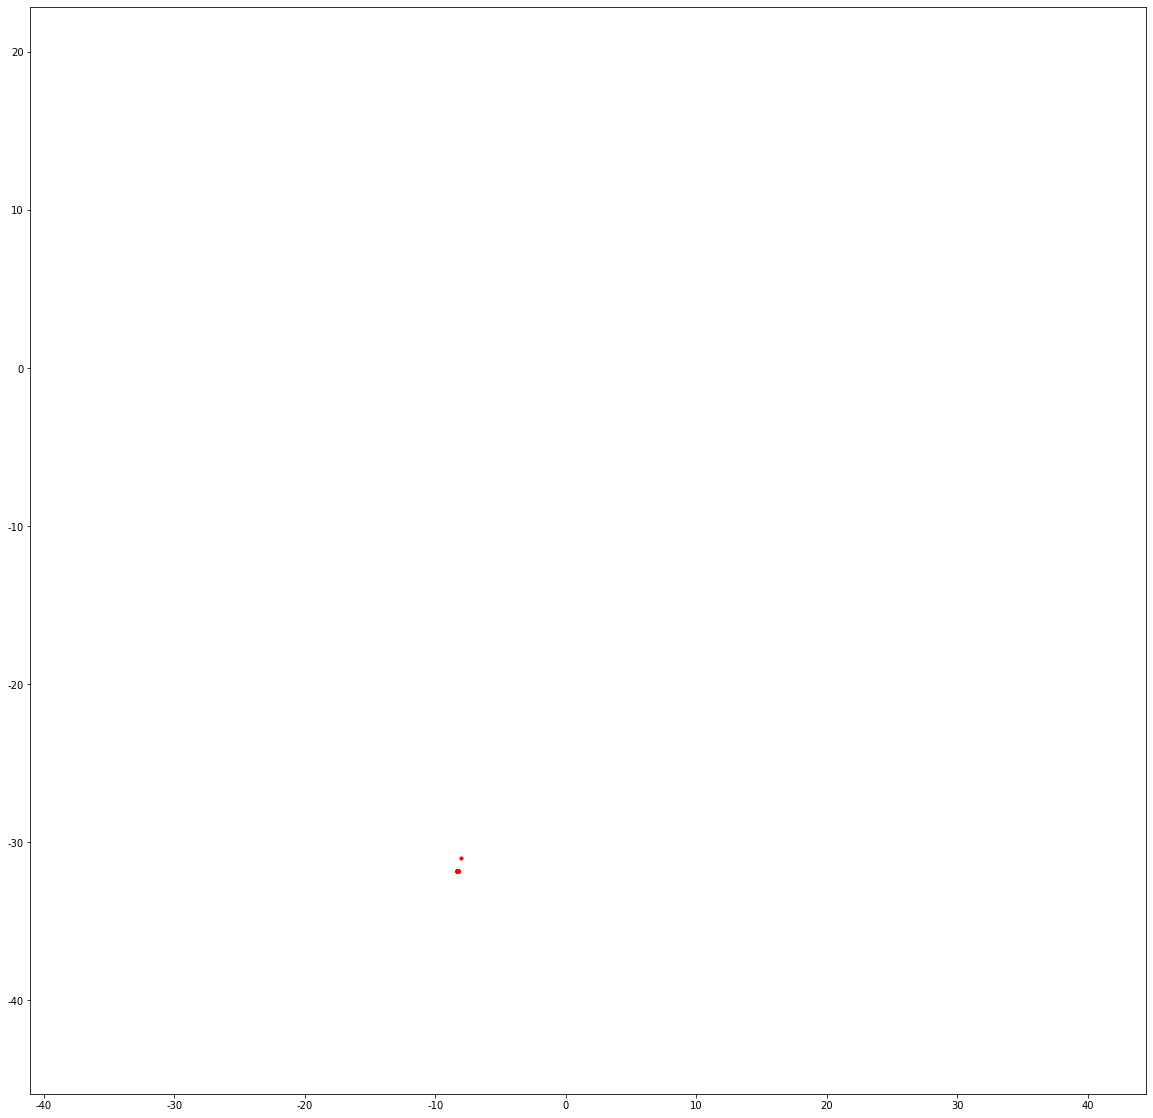

In [328]:
communities_1_3 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,0] > -12 and data_tsne[i,0] < -5 and data_tsne[i,1] < -30:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_3.append(filenames[i])

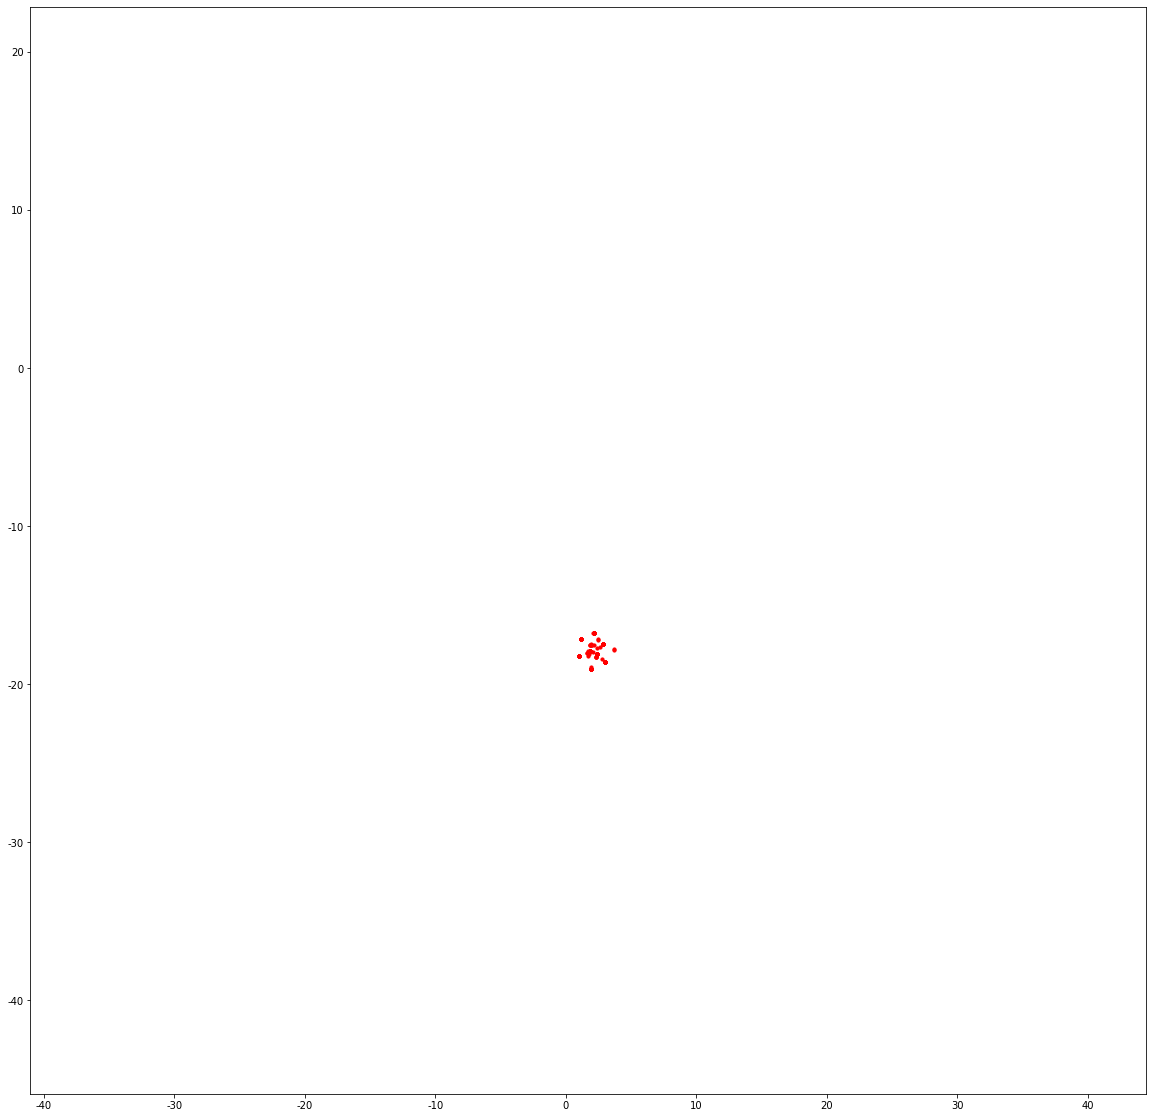

In [329]:
communities_1_4 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,0] > -0 and data_tsne[i,0] < 10 and data_tsne[i,1] < -10 and data_tsne[i,1] > -20:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_4.append(filenames[i])

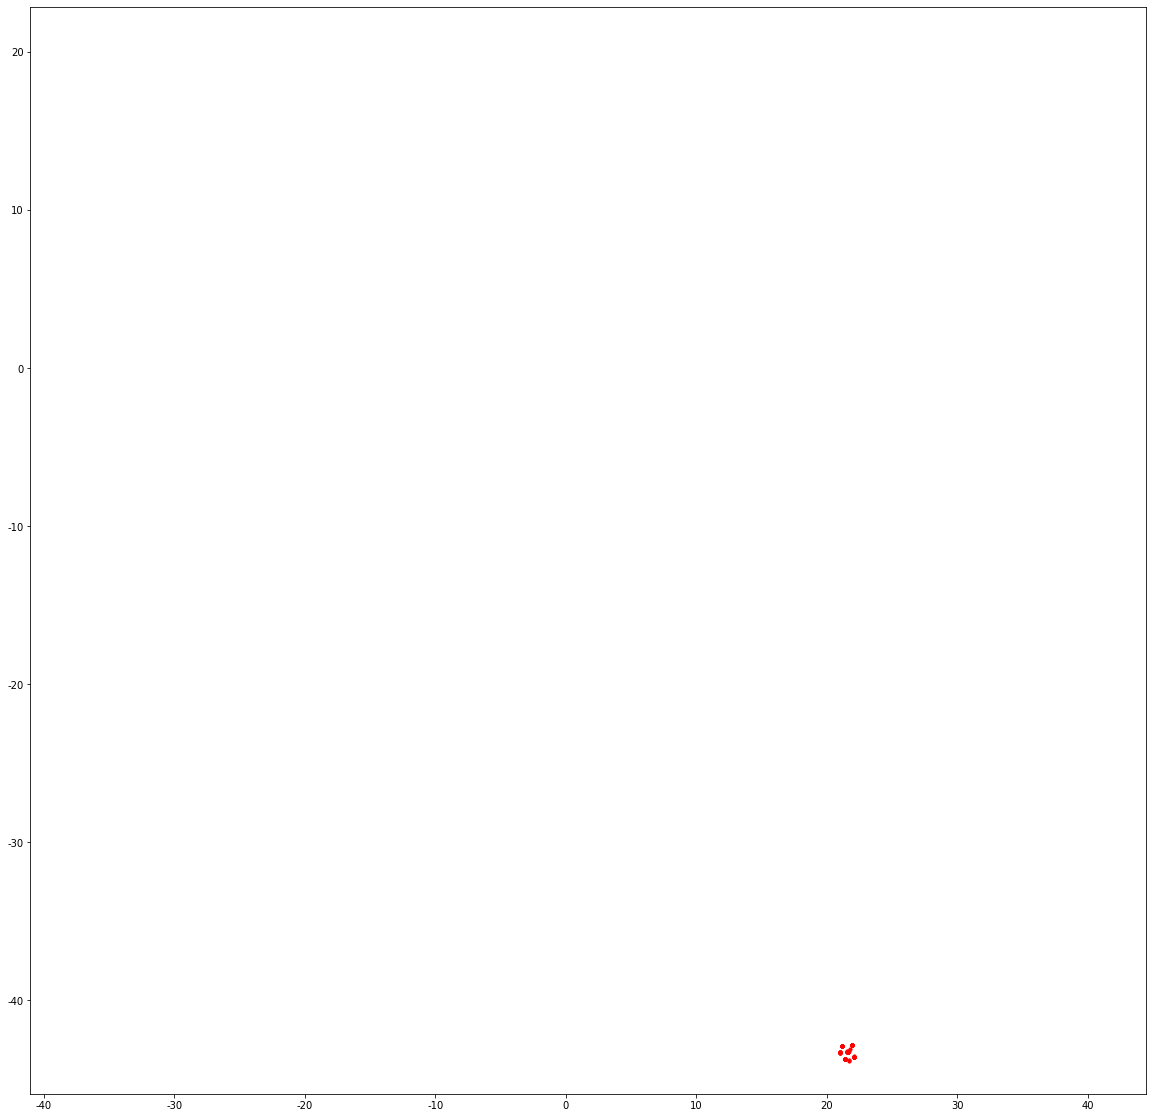

In [330]:
communities_1_5 = []

plt.figure(figsize=(20,20))
plt.xlim(data_tsne[:,0].min(), data_tsne[:,0].max()+1)
plt.ylim(data_tsne[:,1].min(), data_tsne[:,1].max()+1)

for i in range(len(data)):
    if topics_num[i] == 1:
        if data_tsne[i,1] < -40:
            plt.scatter(data_tsne[i,0], data_tsne[i,1], c=color, s=size)
            communities_1_5.append(filenames[i])

In [276]:
import pymysql.cursors
import pandas as pd
import numpy as np
import connect_to_db as cn
import json
from itertools import combinations
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import csv
import parmap
import random

## global all topic words list

In [277]:
def find_csv_filenames(path_to_dir, suffix=".csv" ):
    filenames = listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]

filenames = find_csv_filenames("../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne")

all_topic_words = []

for i in range(len(filenames)):
    with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filenames[i]}', newline='') as f:
        reader = csv.reader(f)
        topics = list(reader)
        topics = sum(topics, [])
        s_tw = set(topics)
        all_topic_words.append(topics)
        
all_topic_words_from_all_files = sum(all_topic_words, [])
print(len(all_topic_words_from_all_files))
sampled = random.sample(all_topic_words_from_all_files, 3)

print(sampled)

82795
['made', 'suggested', 'terrified']


In [342]:
def word_count_and_tf_idf_similarity(filenames, topic_num, print_word_count=True):
    all_topic_words = []

    print(f'topic_num: {topic_num}')
    print('')
    
    for i in range(len(filenames)):
        with open(f'../lda/csv/lda_results/nodes/posts/topic_words_stop_words_removed_10_for_tsne/{filenames[i]}', newline='') as f:
            reader = csv.reader(f)
            topics = list(reader)
            topics = sum(topics, [])
            s_tw = set(topics)
            all_topic_words.append(topics)
           
            tw_count_list = []
        
            for tw in s_tw:
                tw_count_list.append([tw, topics.count(tw)])
            
            tw_count_dict = dict(tw_count_list)
            sorted_dict = sorted(tw_count_dict.items(), key = lambda item: item[1], reverse = True)
            
            if print_word_count:
                print(filenames[i])
                print(sorted_dict)
                print()
                
    all_topic_words = sum(all_topic_words, [])
    s_atw = set(all_topic_words)
    
    atw_count_list = []
    
    for tw in s_atw:
        atw_count_list.append([tw, all_topic_words.count(tw)])
        
    atw_count_dict = dict(atw_count_list)
    all_sorted_dict = sorted(atw_count_dict.items(), key = lambda item: item[1], reverse = True)
    
    print('all topic words count')
    print(all_sorted_dict)
    print()
    
    print(f'number of topic words: {len(all_topic_words)}, number of communities: {len(filenames)}')
    print()
    print(f'random tf-idf similarity: {tf_idf_similarity_from_list(random.sample(all_topic_words_from_all_files, len(all_topic_words)))}')
    print(f'tf-idf similarity: {tf_idf_similarity_from_list(all_topic_words)}')

In [273]:
word_count_and_tf_idf_similarity(communities_3, 3, False)

topic_num: 3

number of topic words: 22287
tf-idf similarity: 0.002334909713455048


In [343]:
word_count_and_tf_idf_similarity(communities_10, 10)

topic_num: 10

community_2_topics_10_words.csv
[('dae', 4), ('life', 2), ('therapy', 2), ('year', 2), ('sleep', 1), ('advice', 1), ('triggered', 1), ('diagnosed', 1), ('medication', 1), ('memory', 1), ('illness', 1), ('stop', 1), ('anxiety', 1), ('fp', 1), ('need', 1), ('ptsd', 1), ('back', 1), ('better', 1), ('old', 1), ('med', 1), ('partner', 1), ('this', 1), ('month', 1), ('hurt', 1), ('one', 1), ('today', 1), ('support', 1), ('question', 1), ('abusive', 1), ('day', 1), ('even', 1), ('talk', 1), ('love', 1), ('mom', 1), ('therapist', 1), ('wrong', 1), ('experience', 1), ('tell', 1), ('go', 1), ('disorder', 1), ('psychosis', 1), ('relationship', 1), ('youâ€™re', 1), ('work', 1), ('normal', 1), ('struggle', 1), ('suicidal', 1), ('bipolar', 1), ('job', 1), ('wish', 1), ('right', 1), ('cptsd', 1), ('thought', 1), ('worse', 1), ('parent', 1), ('keep', 1), ('voice', 1), ('alone', 1), ('first', 1), ('cry', 1), ('feeling', 1), ('you', 1), ('now', 1), ('mental', 1), ('made', 1), ('tw', 1), (

## topic_nums = 5 (members >= 1000)

In [346]:
word_count_and_tf_idf_similarity(communities_5, 5)

topic_num: 5

community_51_topics_10_words.csv
[('bullied', 4), ('bully', 4), ('bullying', 4), ('friend', 3), ('school', 2), ('life', 2), ('need', 2), ('suicide', 2), ('suicidal', 1), ('guy', 1), ('one', 1), ('advice', 1), ('never', 1), ('day', 1), ('much', 1), ('still', 1), ('stop', 1), ('parent', 1), ('living', 1), ('hate', 1), ('kill', 1), ('feeling', 1), ('lost', 1), ('deal', 1), ('die', 1), ('think', 1), ('end', 1), ('depressed', 1), ('depression', 1), ('go', 1), ('person', 1), ('year', 1), ('kid', 1), ('say', 1), ('this', 1)]

community_18_topics_10_words.csv
[('life', 3), ('think', 3), ('crisis', 2), ('existential', 2), ('time', 2), ('depression', 2), ('told', 1), ('death', 1), ('fuck', 1), ('one', 1), ('universe', 1), ('music', 1), ('today', 1), ('advice', 1), ('wish', 1), ('day', 1), ('care', 1), ('tired', 1), ('could', 1), ('real', 1), ('everyone', 1), ('thought', 1), ('scared', 1), ('anxiety', 1), ('living', 1), ('hate', 1), ('kill', 1), ('feeling', 1), ('need', 1), ('anythi

## topic_nums = 4 (members >= 100)

In [348]:
word_count_and_tf_idf_similarity(communities_4, 4)

topic_num: 4

community_214_topics_10_words.csv
[('life', 2), ('depression', 2), ('sleep', 1), ('left', 1), ('one', 1), ('take', 1), ('wish', 1), ('way', 1), ('tired', 1), ('lonely', 1), ('worse', 1), ('pregnant', 1), ('husband', 1), ('hate', 1), ('cry', 1), ('kill', 1), ('love', 1), ('what', 1), ('need', 1), ('continue', 1), ('time', 1), ('box', 1), ('meal', 1), ('better', 1), ('leave', 1), ('nothing', 1), ('give', 1), ('urge', 1), ('depressed', 1), ('this', 1), ('story', 1), ('night', 1), ('woman', 1), ('hard', 1), ('shit', 1), ('suicide', 1), ('hope', 1), ('sad', 1)]

community_435_topics_10_words.csv
[('life', 2), ('need', 2), ('think', 2), ('depressed', 2), ('depression', 2), ('birthday', 1), ('broken', 1), ('today', 1), ('advice', 1), ('okay', 1), ('friend', 1), ('day', 1), ('much', 1), ('tired', 1), ('stop', 1), ('thought', 1), ('keep', 1), ('anxiety', 1), ('alone', 1), ('talk', 1), ('hate', 1), ('kill', 1), ('happy', 1), ('feeling', 1), ('lost', 1), ('time', 1), ('mom', 1), ('t

## topic_nums = 3 (members >= 10)

In [349]:
word_count_and_tf_idf_similarity(communities_3_1, 3)

topic_num: 3

community_1884_topics_10_words.csv
[('advice', 2), ('depression', 2), ('fuck', 1), ('hide', 1), ('well', 1), ('today', 1), ('day', 1), ('everyday', 1), ('reason', 1), ('life', 1), ('keep', 1), ('asking', 1), ('living', 1), ('alone', 1), ('hate', 1), ('handling', 1), ('need', 1), ('time', 1), ('find', 1), ('good', 1), ('actually', 1), ('depressed', 1), ('also', 1), ('successful', 1), ('year', 1), ('two', 1), ('fake', 1), ('smile', 1)]

community_9028_topics_10_words.csv
[('one', 2), ('dad', 2), ('ago', 1), ('death', 1), ('dead', 1), ('brother', 1), ('done', 1), ('today', 1), ('day', 1), ('sudden', 1), ('christmas', 1), ('could', 1), ('painful', 1), ('love', 1), ('lost', 1), ('anything', 1), ('now', 1), ('time', 1), ('unexpectedly', 1), ('last', 1), ('week', 1), ('ive', 1), ('law', 1), ('quitting', 1), ('hardest', 1), ('sepsis', 1), ('passed', 1), ('died', 1)]

community_4593_topics_10_words.csv
[('fuck', 2), ('hate', 2), ('nowhere', 1), ('advice', 1), ('spare', 1), ('witne

random tf-idf similarity: 0.0019107097946485924
tf-idf similarity: 0.003073694321422005


In [350]:
word_count_and_tf_idf_similarity(communities_3_2, 3)

topic_num: 3

community_8969_topics_10_words.csv
[('little', 3), ('alone', 2), ('sister', 2), ('depressed', 2), ('internet', 2), ('hurt', 1), ('user', 1), ('wish', 1), ('day', 1), ('gray', 1), ('ok', 1), ('antidepressant', 1), ('constant', 1), ('bf', 1), ('said', 1), ('stupid', 1), ('accident', 1), ('die', 1), ('jokingly', 1), ('kind', 1), ('fat', 1), ('go', 1), ('laughed', 1), ('fear', 1)]

community_1545_topics_10_words.csv
[('friend', 2), ('lonely', 2), ('anxiety', 2), ('need', 2), ('year', 2), ('marriage', 1), ('control', 1), ('buried', 1), ('quick', 1), ('lease', 1), ('worst', 1), ('saw', 1), ('struggling', 1), ('apartment', 1), ('cause', 1), ('tell', 1), ('depressed', 1), ('around', 1), ('together', 1), ('keeping', 1), ('pussy', 1), ('moved', 1), ('shit', 1), ('soon', 1), ('quarantine', 1)]

community_8454_topics_10_words.csv
[('question', 2), ('better', 2), ('person', 2), ('relationship', 2), ('broken', 1), ('today', 1), ('hello', 1), ('horrible', 1), ('talk', 1), ('first', 1), 

random tf-idf similarity: 0.0019390062914449258
tf-idf similarity: 0.002679246379272812


In [353]:
word_count_and_tf_idf_similarity(communities_3_3, 3)

topic_num: 3

community_10260_topics_10_words.csv
[('hate', 2), ('sleep', 1), ('one', 1), ('body', 1), ('every', 1), ('whole', 1), ('rant', 1), ('could', 1), ('whoâ€™s', 1), ('putting', 1), ('excessive', 1), ('come', 1), ('talking', 1), ('realized', 1), ('feeling', 1), ('imbalance', 1), ('â€œdepression', 1), ('time', 1), ('chemical', 1), ('die', 1), ('use', 1), ('depressed', 1), ('dealing', 1), ('night', 1), ('depression', 1), ('realize', 1), ('dismal', 1), ('brainâ€\x9d', 1), ('anhedonia', 1)]

community_583_topics_10_words.csv
[('anxiety', 2), ('terrified', 1), ('sleep', 1), ('social', 1), ('today', 1), ('ball', 1), ('unable', 1), ('take', 1), ('pain', 1), ('phone', 1), ('harm', 1), ('waking', 1), ('uneasy', 1), ('much', 1), ('seriouslytwself', 1), ('theyll', 1), ('feeling', 1), ('suck', 1), ('back', 1), ('thatâ€™s', 1), ('girl', 1), ('pc', 1), ('realize', 1), ('go', 1), ('started', 1), ('cute', 1), ('work', 1), ('something', 1), ('attractive', 1)]

community_1024_topics_10_words.csv

random tf-idf similarity: 0.0020417990825999854
tf-idf similarity: 0.0026126346331877813


In [354]:
word_count_and_tf_idf_similarity(communities_3_4, 3)

topic_num: 3

community_8432_topics_10_words.csv
[('insecure', 1), ('extremely', 1), ('body', 1), ('one', 1), ('drunk', 1), ('friend', 1), ('way', 1), ('right', 1), ('game', 1), ('option', 1), ('bday', 1), ('allowed', 1), ('life', 1), ('consistent', 1), ('cry', 1), ('loved', 1), ('feeling', 1), ('poem', 1), ('online', 1), ('actually', 1), ('family', 1), ('tried', 1), ('depressed', 1), ('say', 1), ('aware', 1), ('honestly', 1), ('depression', 1), ('fantasize', 1), ('wrote', 1), ('head', 1)]

community_3692_topics_10_words.csv
[('peace', 1), ('knew', 1), ('working', 1), ('uncle', 1), ('yo', 1), ('relative', 1), ('best', 1), ('friend', 1), ('every', 1), ('day', 1), ('killing', 1), ('cry', 1), ('feeling', 1), ('lost', 1), ('sister', 1), ('find', 1), ('think', 1), ('heard', 1), ('thursday', 1), ('old', 1), ('loss', 1), ('thirteen', 1), ('dealing', 1), ('confused', 1), ('professional', 1), ('long', 1), ('after', 1), ('dad', 1), ('passed', 1), ('died', 1)]

community_3430_topics_10_words.csv


all topic words count
[('life', 140), ('depression', 99), ('need', 96), ('friend', 94), ('think', 78), ('kill', 77), ('depressed', 73), ('die', 73), ('feeling', 71), ('year', 71), ('one', 68), ('time', 66), ('thought', 59), ('suicide', 57), ('day', 52), ('today', 48), ('suicidal', 47), ('anxiety', 46), ('care', 45), ('hate', 45), ('talk', 44), ('never', 42), ('go', 42), ('advice', 42), ('lonely', 39), ('alone', 38), ('bad', 38), ('parent', 37), ('tired', 37), ('even', 35), ('family', 35), ('way', 35), ('mental', 35), ('tell', 34), ('ive', 34), ('cry', 32), ('first', 32), ('stop', 31), ('love', 31), ('sad', 31), ('much', 30), ('good', 30), ('birthday', 30), ('end', 29), ('scared', 29), ('wish', 28), ('keep', 28), ('give', 28), ('work', 27), ('back', 27), ('better', 27), ('best', 27), ('last', 27), ('reason', 27), ('therapy', 27), ('still', 26), ('lost', 26), ('getting', 26), ('told', 26), ('month', 26), ('old', 25), ('happy', 25), ('shit', 24), ('mom', 24), ('killing', 24), ('new', 24),

random tf-idf similarity: 0.00205718799744352
tf-idf similarity: 0.0020067209612936497


## topic_nums = 1 (members < 10)

In [356]:
word_count_and_tf_idf_similarity(communities_1_1, 3)

topic_num: 3

community_6849_topics_10_words.csv
[('man', 1), ('kid', 1), ('in', 1), ('irish', 1), ('best', 1), ('hate', 1), ('looking', 1), ('friend', 1)]

community_15358_topics_10_words.csv
[('break', 1), ('start', 1), ('struggling', 1), ('convos', 1), ('email', 1), ('catch', 1), ('guy', 1), ('unread', 1)]

community_8878_topics_10_words.csv
[('need', 1), ('child', 1), ('lonely', 1), ('protected', 1), ('talk', 1), ('wish', 1), ('f18', 1), ('short', 1)]

community_15569_topics_10_words.csv
[('vent', 1), ('problem', 1), ('fast', 1), ('teenager', 1), ('help', 1), ('want', 1), ('growing', 1), ('stupid', 1)]

community_5835_topics_10_words.csv
[('exactly', 1), ('depression', 1), ('covid', 1), ('mood', 1), ('low', 1), ('angry', 1), ('boyfriend', 1), ('right', 1)]

community_7826_topics_10_words.csv
[('draining', 1), ('emotionally', 1), ('wife', 1), ('broke', 1), ('talk', 1), ('girl', 1), ('blind', 1), ('work', 1)]

community_14193_topics_10_words.csv
[('break', 1), ('safety', 1), ('ensure

random tf-idf similarity: 0.00210345579987457
tf-idf similarity: 0.001769174828272673


In [357]:
word_count_and_tf_idf_similarity(communities_1_2, 1)

topic_num: 1

community_3663_topics_10_words.csv
[('friend', 1), ('almost', 1), ('killed', 1), ('infront', 1)]

community_7028_topics_10_words.csv
[('life', 1), ('ive', 1), ('stagnating', 1), ('year', 1)]

community_1882_topics_10_words.csv
[('stay', 1), ('every', 1), ('post', 1), ('reason', 1)]

community_4336_topics_10_words.csv
[('mind', 1), ('need', 1), ('sad', 1), ('pregnant', 1)]

community_9228_topics_10_words.csv
[('good', 1), ('depression', 1), ('person', 1), ('partner', 1)]

community_8393_topics_10_words.csv
[('hate', 1), ('drama', 1), ('cope', 1), ('struggling', 1)]

community_9954_topics_10_words.csv
[('teeth', 1), ('anxiety', 1), ('chattering', 1), ('overcome', 1)]

community_7291_topics_10_words.csv
[('ðÿ¥´', 1), ('ainâ€™t', 1), ('skin', 1), ('pick', 1)]

community_2982_topics_10_words.csv
[('birthday', 1), ('fuck', 1), ('die', 1), ('wish', 1)]

community_2762_topics_10_words.csv
[('hate', 1), ('parent', 1), ('girlfriend', 1), ('whole', 1)]

community_8567_topics_10_word

random tf-idf similarity: 0.002014543705556172
tf-idf similarity: 0.002449633088725817


In [358]:
word_count_and_tf_idf_similarity(communities_1_3, 1)

topic_num: 1

community_8367_topics_10_words.csv
[('anxiety', 1), ('breathing', 1)]

community_7936_topics_10_words.csv
[('abilifyrexulti', 1), ('withdrawal', 1)]

community_9591_topics_10_words.csv
[('advice', 1), ('year', 1)]

community_16420_topics_10_words.csv
[('someone', 1), ('help', 1)]

community_315_topics_10_words.csv
[('problem', 1), ('save', 1)]

community_15525_topics_10_words.csv
[('sad', 1), ('die', 1)]

community_4750_topics_10_words.csv
[('know', 1), ('donâ€™t', 1)]

community_12740_topics_10_words.csv
[('buddy', 1), ('check', 1)]

community_3643_topics_10_words.csv
[('loser', 1), ('lonely', 1)]

community_6686_topics_10_words.csv
[('think', 1), ('leave', 1)]

community_9227_topics_10_words.csv
[('jury', 1), ('duty', 1)]

community_8037_topics_10_words.csv
[('child', 1), ('post', 1)]

community_7928_topics_10_words.csv
[('life', 1), ('point', 1)]

community_964_topics_10_words.csv
[('expressing', 1), ('trouble', 1)]

community_19943_topics_10_words.csv
[('wanted', 1), 

In [359]:
word_count_and_tf_idf_similarity(communities_1_4, 1)

topic_num: 1

community_8382_topics_10_words.csv
[('every', 1), ('opening', 1), ('session', 1), ('counseling', 1), ('anxious', 1), ('cry', 1), ('message', 1)]

community_7853_topics_10_words.csv
[('genuine', 1), ('joy', 1), ('wrong', 1), ('definetely', 1), ('longer', 1), ('loved', 1), ('something', 1)]

community_16855_topics_10_words.csv
[('woah', 1), ('interesting', 1), ('depression', 1), ('key', 1), ('title', 1), ('cured', 1), ('finally', 1)]

community_2299_topics_10_words.csv
[('much', 1), ('pressure', 1), ('better', 1), ('never', 1), ('high', 1), ('low', 1), ('point', 1)]

community_2756_topics_10_words.csv
[('exgirlfriend', 1), ('mental', 1), ('trauma', 1), ('rock', 1), ('bottom', 1), ('health', 1), ('hitting', 1)]

community_11003_topics_10_words.csv
[('time', 1), ('broken', 1), ('first', 1), ('stating', 1), ('worthless', 1), ('officially', 1), ('sharing', 1)]

community_8322_topics_10_words.csv
[('drowning', 1), ('hurt', 1), ('hard', 1), ('debt', 1), ('help', 1), ('never', 1),

random tf-idf similarity: 0.0020833308854309313
tf-idf similarity: 0.0019187387971786507


In [360]:
word_count_and_tf_idf_similarity(communities_1_5, 1)

topic_num: 1

community_12050_topics_10_words.csv
[('future', 1)]

community_5569_topics_10_words.csv
[('exist', 1)]

community_813_topics_10_words.csv
[('tell', 1)]

community_17427_topics_10_words.csv
[('kill', 1)]

community_652_topics_10_words.csv
[('chat', 1)]

community_9801_topics_10_words.csv
[('know', 1)]

community_6430_topics_10_words.csv
[('do', 1)]

community_1135_topics_10_words.csv
[('lonely', 1)]

community_4164_topics_10_words.csv
[('happy', 1)]

community_5867_topics_10_words.csv
[('die', 1)]

community_5024_topics_10_words.csv
[('fed', 1)]

community_1555_topics_10_words.csv
[('forget', 1)]

community_12126_topics_10_words.csv
[('paralyzed', 1)]

community_12515_topics_10_words.csv
[('take', 1)]

community_14504_topics_10_words.csv
[('argument', 1)]

community_11677_topics_10_words.csv
[('fuck', 1)]

community_12081_topics_10_words.csv
[('alone', 1)]

community_3276_topics_10_words.csv
[('medication', 1)]

community_5879_topics_10_words.csv
[('man', 1)]

community_41